# Mushroom Classification Using Different Classifiers (Edible or Poisonous )

#### In this project, we will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.
#### The dataset used in this project is "mushrooms.csv" which contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc. and is made available by UCI Machine Learning.

### Importing the packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
# import graphviz

#### Checking the files in the directory

In [2]:
print(os.listdir("C:/Users/ammar/Desktop/paamy/courses/ML/ML-Projects/assignment/Mushroom-classification"))

['.git', '.ipynb_checkpoints', 'images1', 'images2', 'LICENSE', 'Mushroom-Classification.ipynb', 'mushroom2.ipynb', 'mushrooms.csv', 'README.md']


### Reading the csv file of the dataset

#### Pandas read_csv() function imports a CSV file (in our case, ‘mushrooms.csv’) to DataFrame format.

In [3]:
os.chdir("C:/Users/ammar/Desktop/paamy/courses/ML/ML-Projects/assignment/Mushroom-classification")
df = pd.read_csv("mushrooms.csv")

In [4]:
df.shape

(8124, 23)

### Just for simplicty I just want to use the 10 attributes( columns) for this assignment

In [5]:
print(df.columns.tolist())

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [6]:
selected_columns = ['class', 'cap-shape', 'cap-color', 'odor', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'habitat', 'population']
df = df[selected_columns]


In [7]:
df.shape

(8124, 10)

In [8]:
print(df.columns.tolist())

['class', 'cap-shape', 'cap-color', 'odor', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'habitat', 'population']


# Examining the Data

#### After importing the data, to learn more about the dataset, we'll use .head() .info() and .describe() methods.

In [9]:
df.head()

,class,cap-shape,cap-color,odor,gill-size,gill-color,stalk-shape,stalk-root,habitat,population
0,p,x,n,p,n,k,e,e,u,s
1,e,x,y,a,b,k,e,c,g,n
2,e,b,w,l,b,n,e,c,m,n
3,p,x,w,p,n,n,e,e,u,s
4,e,x,g,n,b,k,t,e,g,a


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        8124 non-null   object
 1   cap-shape    8124 non-null   object
 2   cap-color    8124 non-null   object
 3   odor         8124 non-null   object
 4   gill-size    8124 non-null   object
 5   gill-color   8124 non-null   object
 6   stalk-shape  8124 non-null   object
 7   stalk-root   8124 non-null   object
 8   habitat      8124 non-null   object
 9   population   8124 non-null   object
dtypes: object(10)
memory usage: 634.8+ KB


In [11]:
df.describe()

,class,cap-shape,cap-color,odor,gill-size,gill-color,stalk-shape,stalk-root,habitat,population
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,10,9,2,12,2,5,7,6
top,e,x,n,n,b,b,t,b,d,v
freq,4208,3656,2284,3528,5612,1728,4608,3776,3148,4040


### Shape of the dataset

In [12]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 10)


### Visualizing the count of edible and poisonous mushrooms

In [13]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [14]:
df["class"].unique()

array(['p', 'e'], dtype=object)

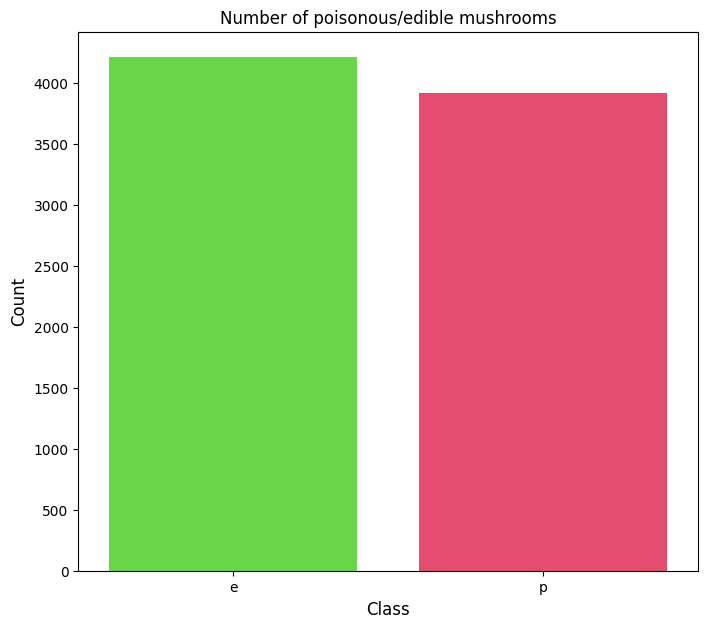

In [15]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, hue=count.index, legend=False, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=900)
plt.show()

#### The dataset is balanced.

# Data Manipulation

#### The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.
#### This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [16]:
df = df.astype('category')

In [17]:
df.dtypes

class          category
cap-shape      category
cap-color      category
odor           category
gill-size      category
gill-color     category
stalk-shape    category
stalk-root     category
habitat        category
population     category
dtype: object

In [18]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [19]:
df.head()

,class,cap-shape,cap-color,odor,gill-size,gill-color,stalk-shape,stalk-root,habitat,population
0,1,5,4,6,1,4,0,3,5,3
1,0,5,9,0,0,4,0,2,1,2
2,0,0,8,3,0,5,0,2,3,2
3,1,5,8,6,1,5,0,3,5,3
4,0,5,3,5,0,4,1,3,1,0


### Quick look at the characteristics of the data

<!-- #### The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification. -->

In [20]:
# df_div = pd.melt(df, "class", var_name="Characteristics")
# fig, ax = plt.subplots(figsize=(16,6))
# p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
# df_no_class = df.drop(["class"],axis = 1)
# p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
# #plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

### Let's look at the correlation between the variables

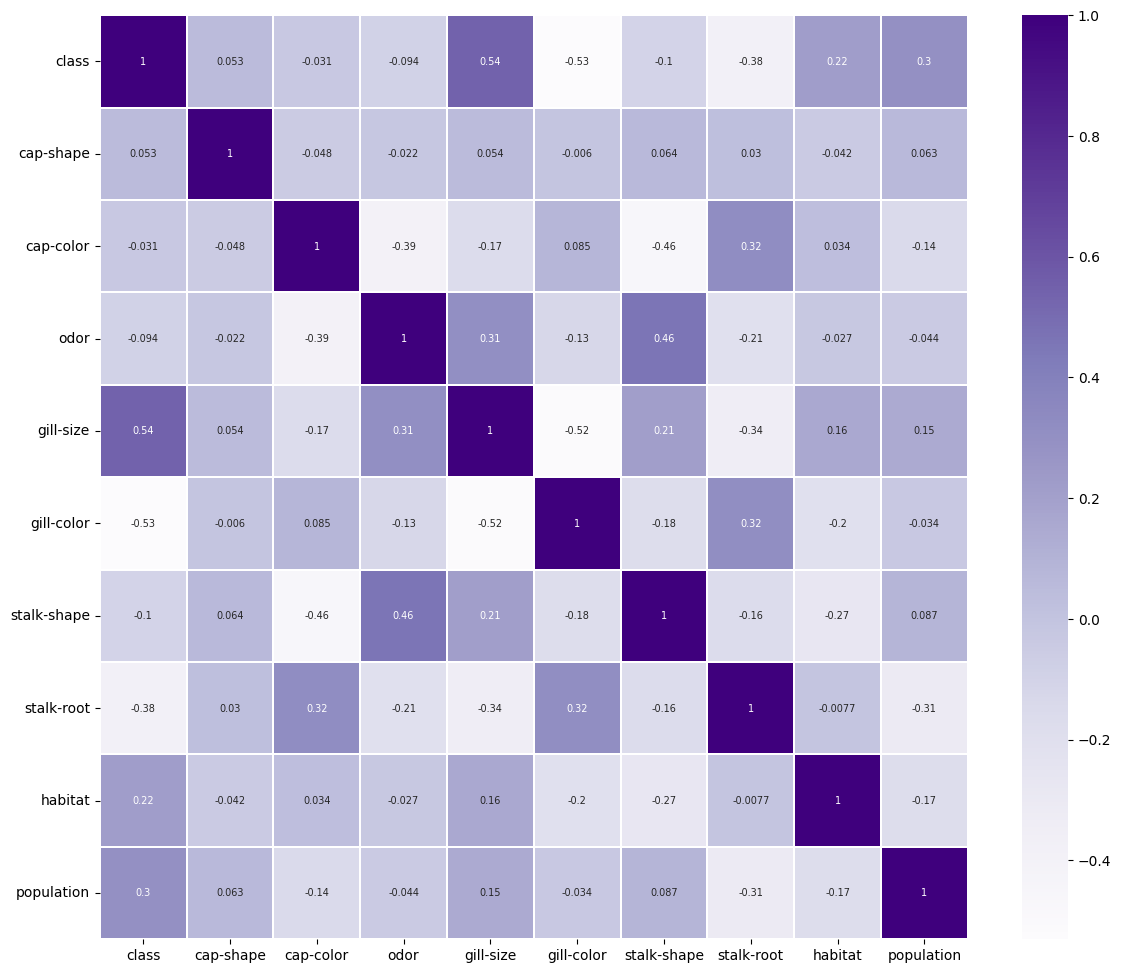

In [21]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

<!-- #### Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely. -->

In [22]:
# df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

#### Let's look closely at the feature "gill-color".

In [23]:
# new_var = df[['class', 'gill-color']]
# new_var = new_var[new_var['gill-color']<=3.5]
# sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
# #plt.savefig("gillcolor1.png", format='png', dpi=900, bbox_inches='tight')

In [24]:
# new_var=df[['class', 'gill-color']]
# new_var=new_var[new_var['gill-color']>3.5]

# sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
# #plt.savefig("gillcolor2.png", format='png', dpi=900, bbox_inches='tight')

# Preparing the Data

##### Setting X and y axis and splitting the data into train and test respectively.

In [25]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)   

# Classification Methods

## 1. Decision Tree Classification

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# dot_data = export_graphviz(dt, out_file=None, 
#                          feature_names=X.columns,  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = graphviz.Source(dot_data)
# #graph.render(filename='DecisionTree')
# graph

## Feature importance

#### By all methods examined before the feature that is most important is "gill-color".

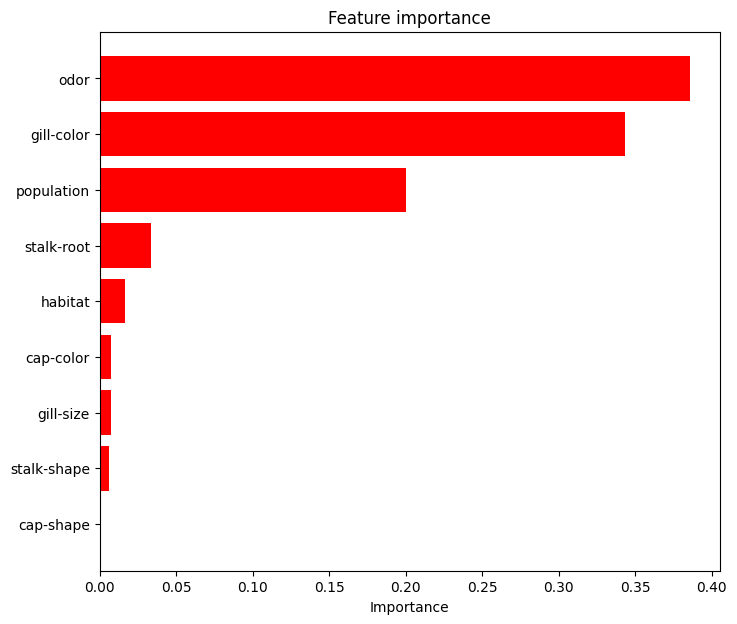

In [28]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

### Predicting and estimating the result

In [29]:
y_pred_dt = dt.predict(X_test)

In [30]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [31]:
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


### Confusion Matrix for Decision Tree Classifier

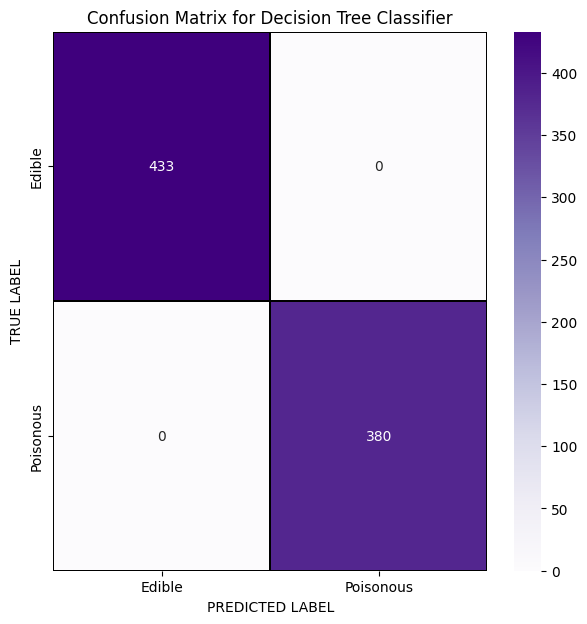

In [32]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 2. Logistic Regression Classification

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 86.59%


#### Classification report of Logistic Regression Classifier

In [34]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.88      0.87      0.87       433
           1       0.85      0.86      0.86       380

    accuracy                           0.87       813
   macro avg       0.87      0.87      0.87       813
weighted avg       0.87      0.87      0.87       813



### Confusion Matrix for Logistic Regression Classifier

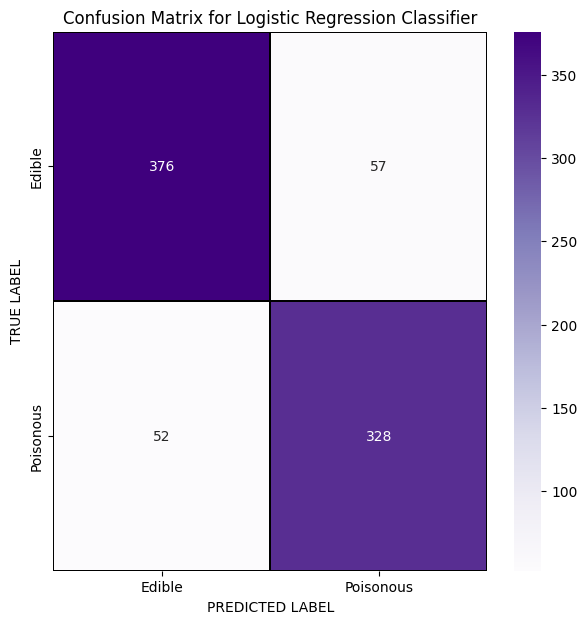

In [35]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 3. KNN Classification

In [36]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


#### Classification report of KNN Classifier

In [37]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       433
           1       1.00      0.99      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



### Confusion Matrix for KNN Classifier

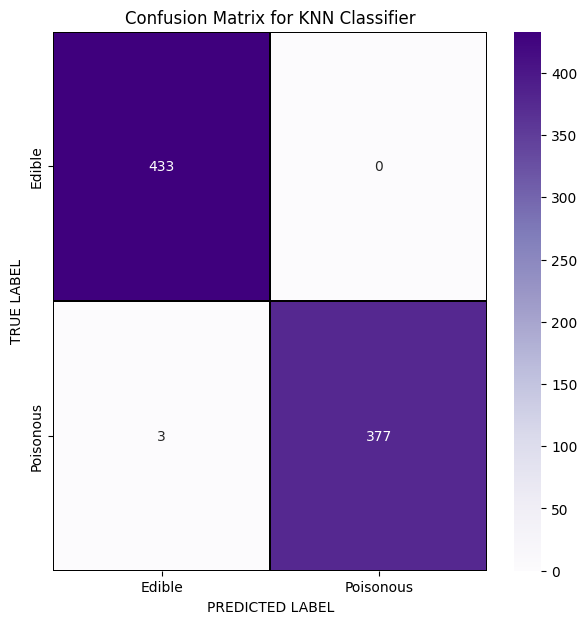

In [38]:
cm = confusion_matrix(y_test, y_pred_knn)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 4. SVM Classification

In [39]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


#### Classification report of SVM Classifier

In [40]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



### Confusion Matrix for SVM Classifier

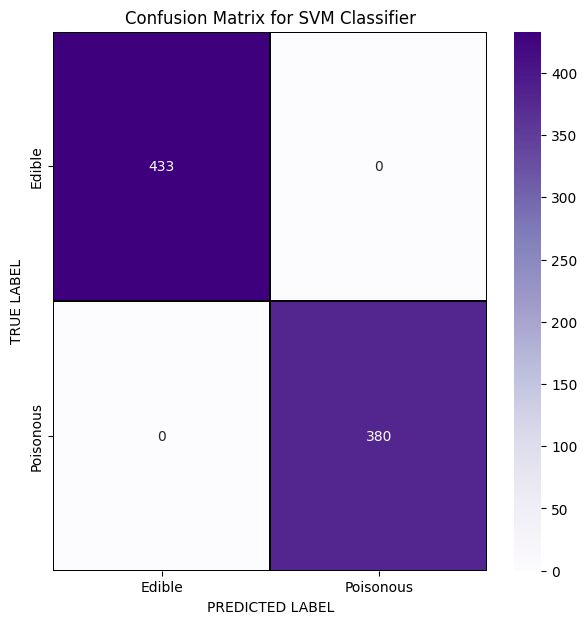

In [41]:
cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 5. Naive Bayes Classification

In [42]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 87.95%


#### Classification report of Naive Bayes Classifier

In [43]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.88      0.90      0.89       433
           1       0.88      0.86      0.87       380

    accuracy                           0.88       813
   macro avg       0.88      0.88      0.88       813
weighted avg       0.88      0.88      0.88       813



### Confusion Matrix for Naive Bayes Classifier

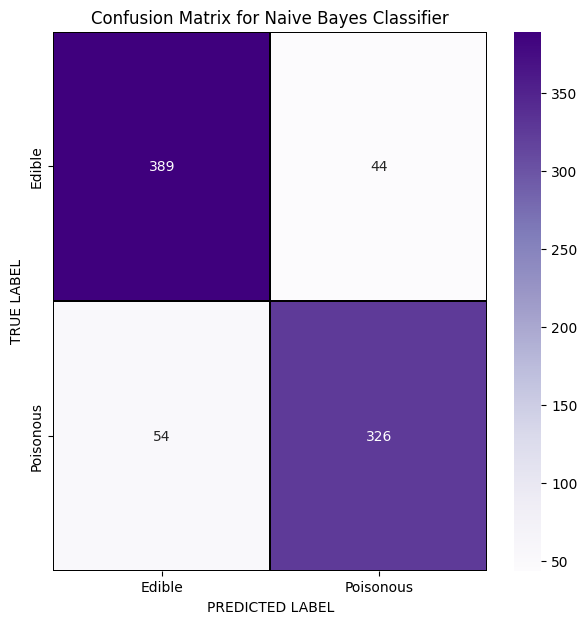

In [44]:
cm = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 6. Random Forest Classification

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


#### Classification report of Random Forest Classifier

In [46]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



### Confusion Matrix for Random Forest Classifier

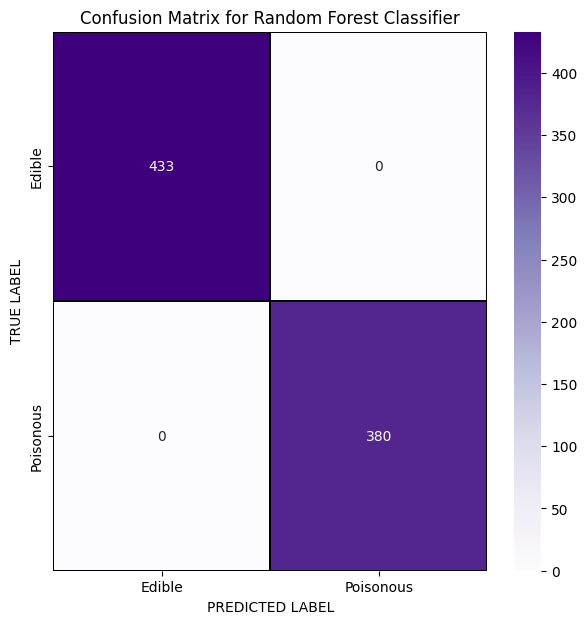

In [47]:
cm = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# Predictions

### Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

In [48]:
preds = dt.predict(X_test)

print(preds[:36])
print(y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


### As we can see the predicted and the true values match 100%.

# Conclusion

#### From the confusion matrix, we saw that our train and test data is balanced.
#### Most of the classification methods hit 100% accuracy with this dataset.